<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [154]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [155]:
sat = './sat_scores.csv'

# load data and print the dimensions
df = pd.read_csv(sat)
print (df.head())

df.shape

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516


(52, 4)

In [156]:
state = df['State'].tolist()
rate = df['Rate'].tolist()
verbal = df['Verbal'].tolist()
math = df['Math'].tolist()
column = range(52)

sat_dict = {"Column":column, "State":state, "Verbal":verbal, "Math":math, "Rate":rate}

sat_dict

{'Column': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 'Math': [510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551,
  514],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'State

Since this project have not asked us to solve the problems in any particular order, I have solved the second problem first by creating a dataframe from the csv module. Afterwards, I have proceeded onto making the dictionary from the dataframe.

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

This problem was completed above.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [157]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


It seems that our data describes the average Verbal and Math SAT scores across the different states in U.S. In addition, we can presume that the "Rate" refers to the rate/percentage of all high school students that has taken the SAT test.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [158]:
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

State: This column contains all the different states in the U.S. that has collected information on the students that have taken the SAT test. The type of variable in this column is an object.

Rate: This column represents the rate of all high school students that have taken the SAT test as not all high school students are required to take the SAT test in order to graduate. The type of variable in this column is an int.

Verbal: This column represents the average score of all the students on the Verbal portion of the SAT test (which ranges from a minimum of 200 to a maximum score of 800) for its respective State. The type of variable in this column is an int.

Math: This column represents the average score of all the students on the Math portion of the SAT test (which ranges from a minimum of 200 to a maximum score of 800) for its respective State. The type of variable in this column is an int.

The SAT Score dataframe has a shape of 52 rows and 4 columns. While we know that that the 4 columns refer to the columns described in the dictionary above, it is bizzare that there would be 52 rows as there are only 50 states in the U.S. After looking at the tail of the dataframe, we see that there is a row with a value of "All" under the "State" column. Further analysis will be needed during the EDA to identify where the other extra row is coming from.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [159]:
df.drop(df.index[51],inplace=True)

Removes the last row of "All" States as we do not want to include it as part of the EDA of the invidiual states.

In [160]:
len(df.State.unique())

51

We double check the list of States to see if there were any duplicates.

In [161]:
##### Imported the 50 states in the US as a comparison against the "state" list we have from SAT_test
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

#Returns all values in our "state" list that isn't in the 50 states list
set(state).difference(states)

{'All', 'DC'}

Since we removed the "All" row earlier, we see that the reason why there are 51 rows are because Washington D.C. was included and considered a "State" even though it's techincally considered a federal district and not a state. However, for this purpose, we will keep DC as there are high schools in DC and we want to represent all parts of the U.S. for this analysis.

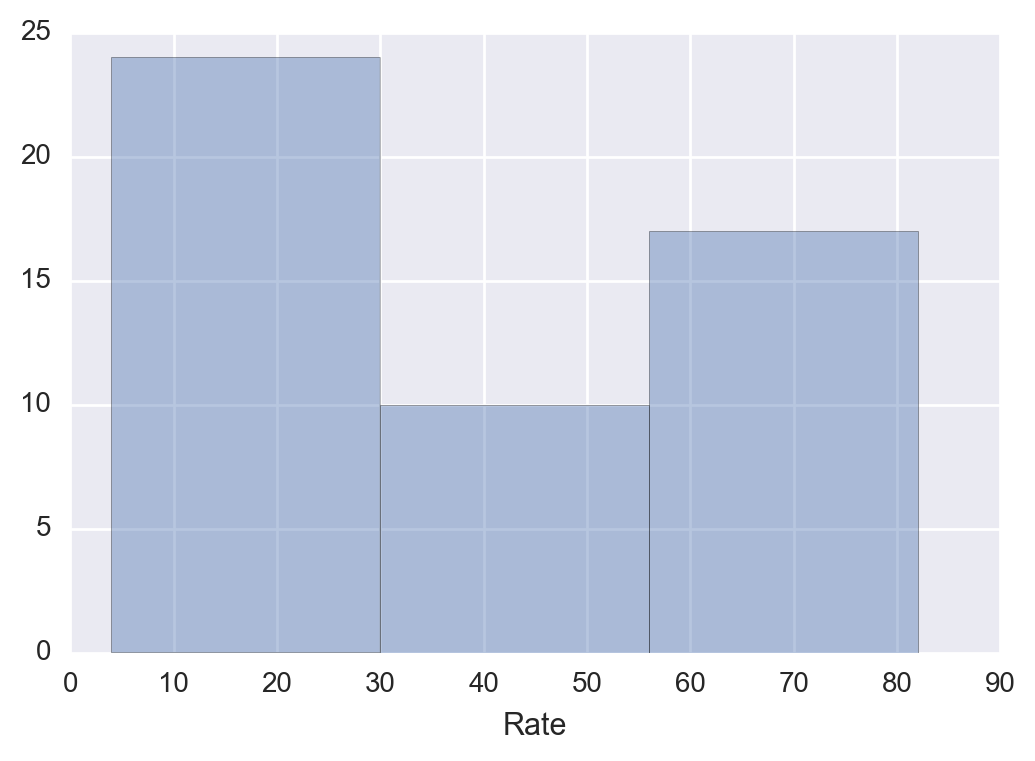

In [162]:
sns.distplot(df.Rate, kde=False)

The bin size is too large to see the distribution of Rate across the states. 

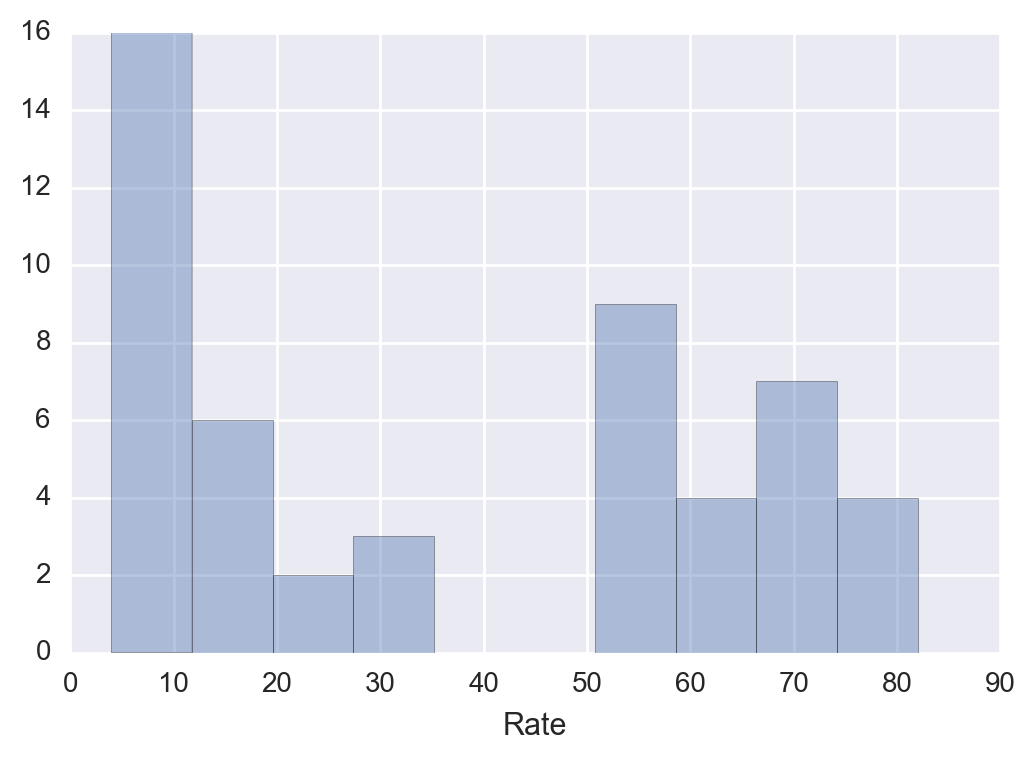

In [163]:
sns.distplot(df.Rate, kde=False, bins=10)

The distribution of Rates across the states seems to be bimodal and right skewed

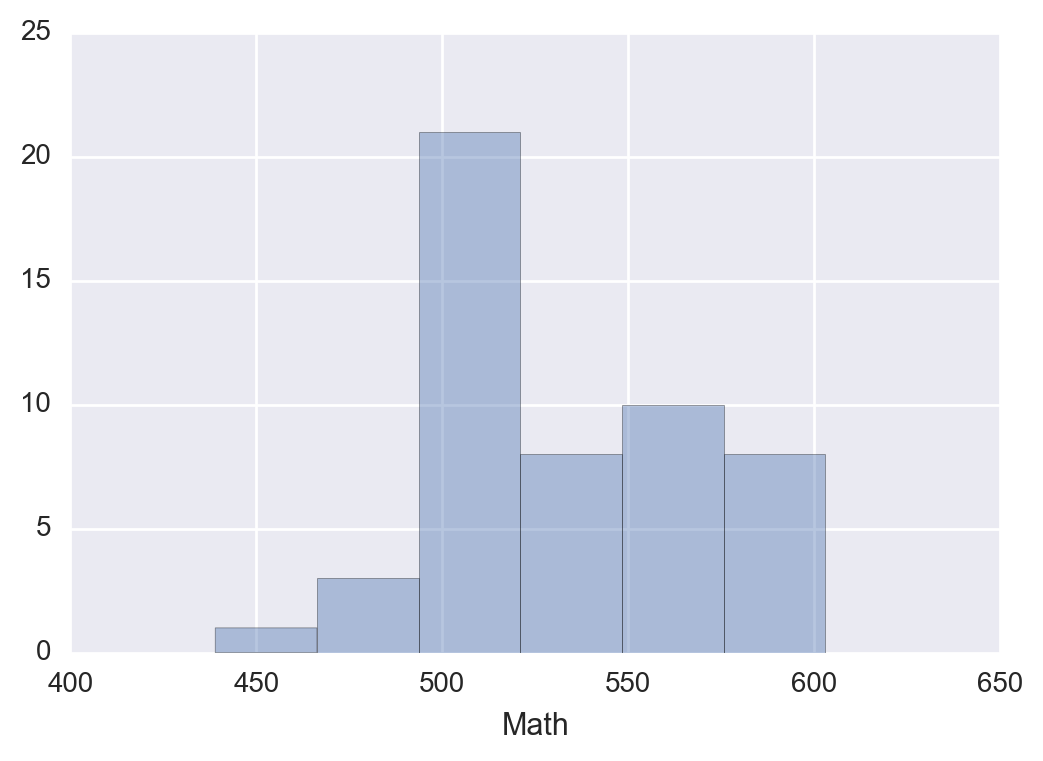

In [164]:
sns.distplot(df.Math, kde=False)

The distribution of Math scores across the states seems to be left skewed.

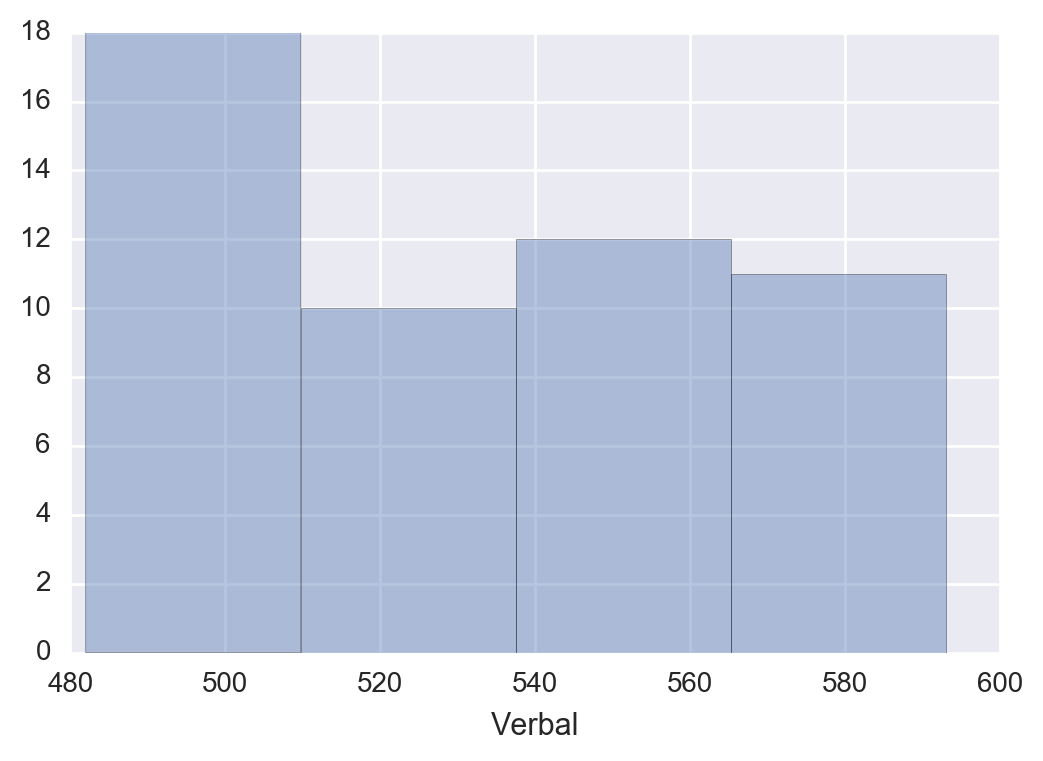

In [165]:
sns.distplot(df.Verbal, kde=False)

The bin size is too large to see the distribution of Rate across the states. 

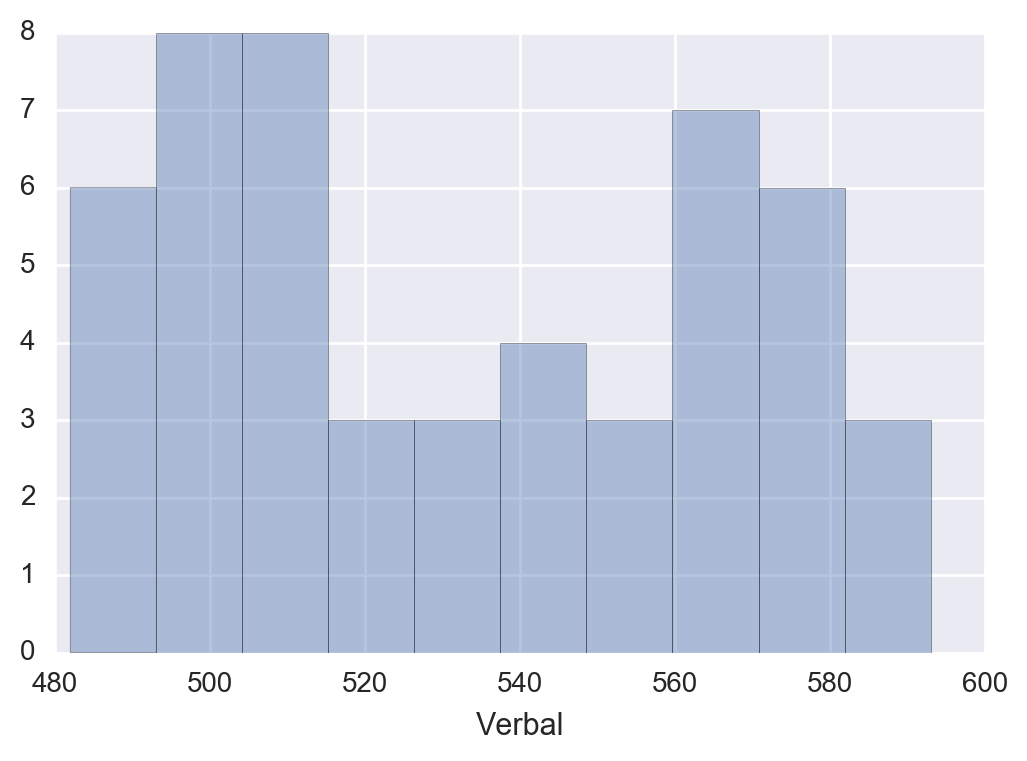

In [166]:
sns.distplot(df.Verbal, kde=False, bins = 10)

The distribution of Verbal scores across the states seem to be bimodal.

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

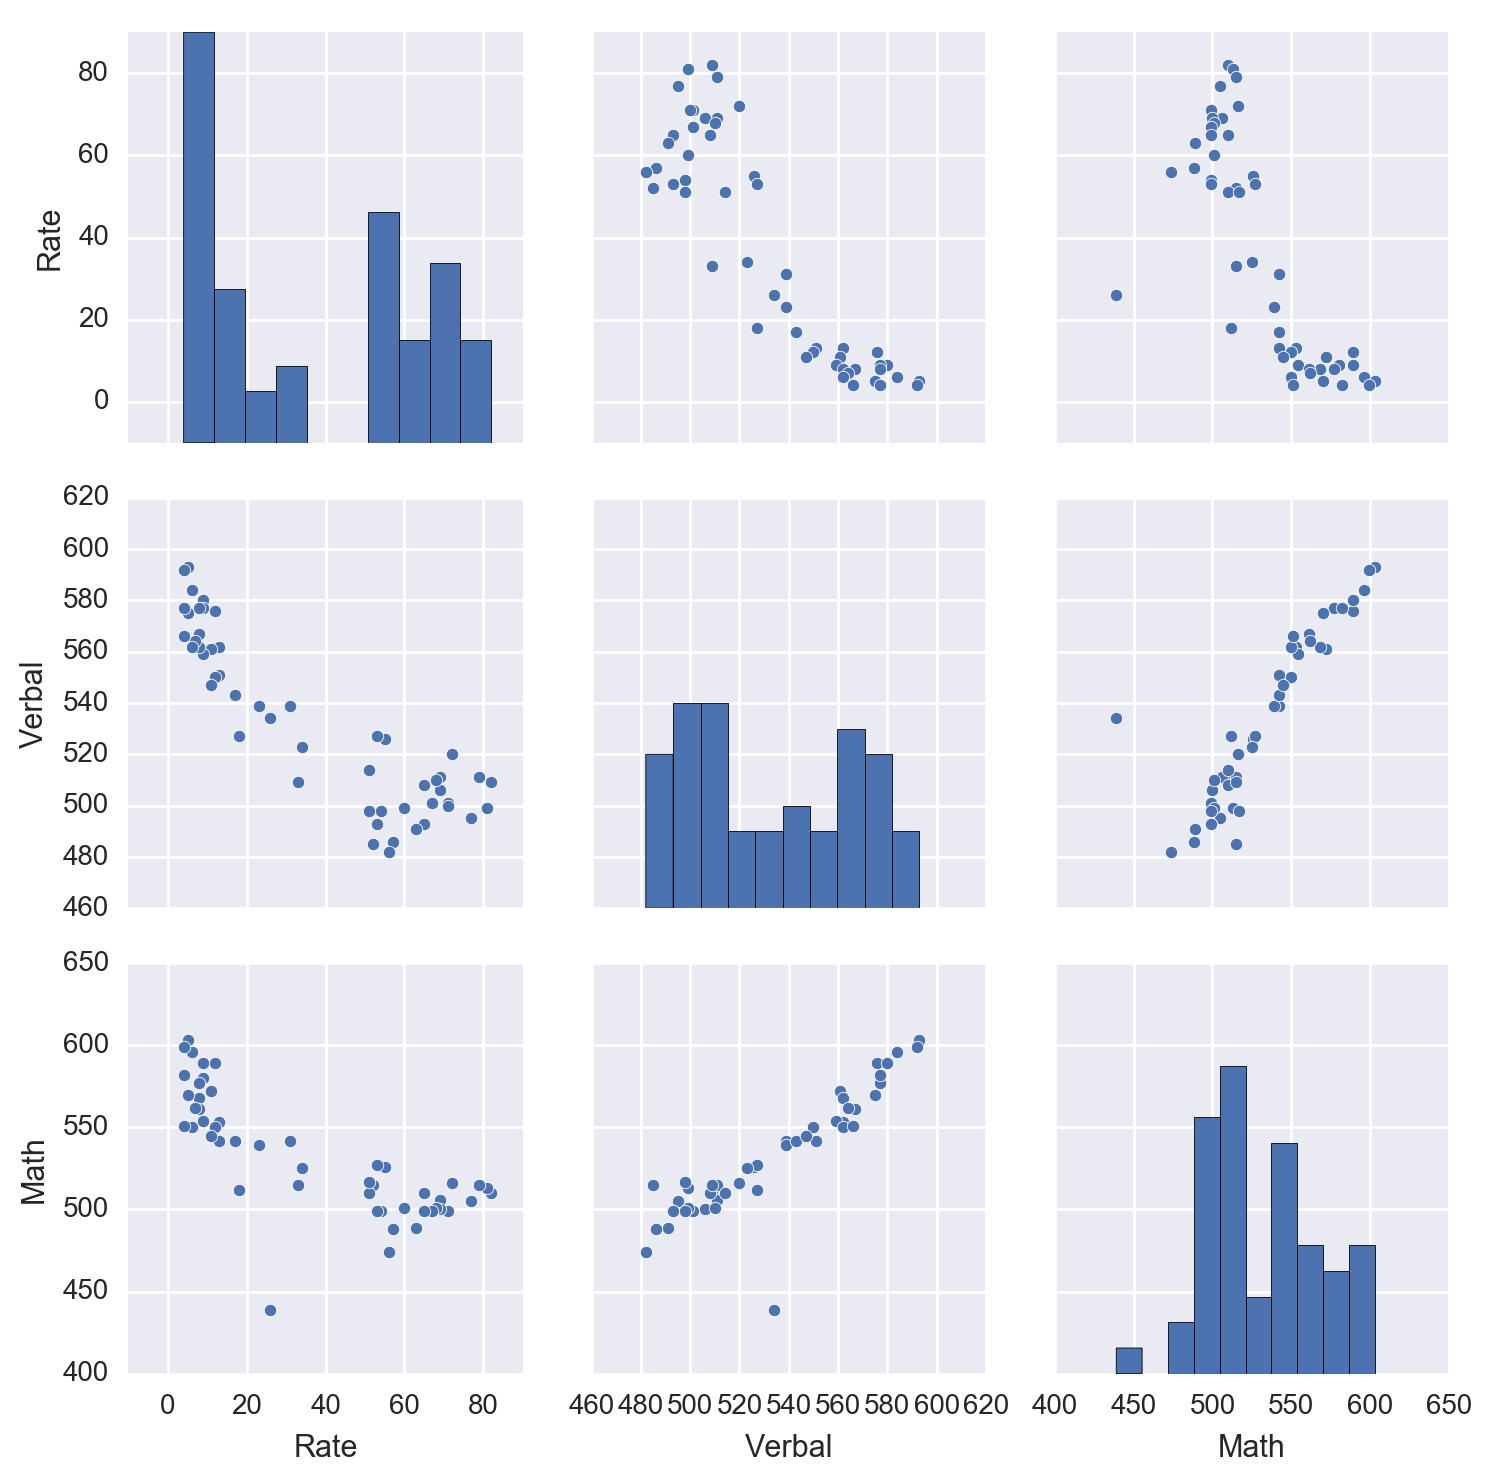

In [167]:
sns.pairplot(df[["Rate", "Verbal", "Math"]])


The Verbal Scores and Math Scores seem to have a positive relationship. On the other hand, both Math and Verbal scores seem to have a negative relationship with Rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

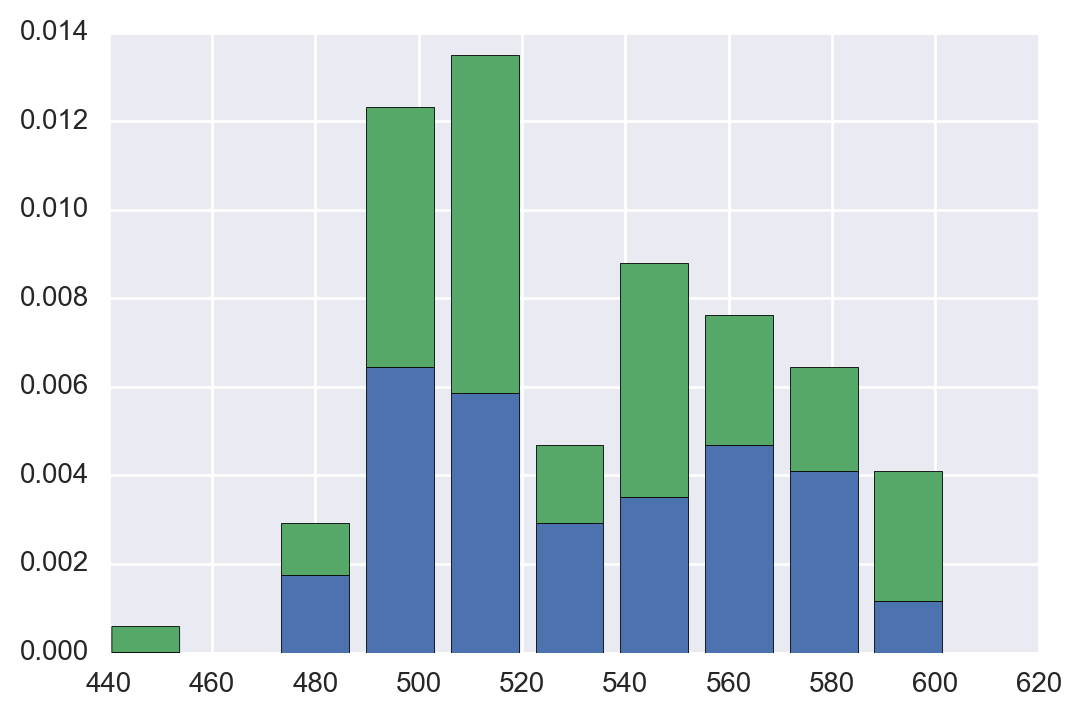

In [168]:
plt.figure()
plt.hist([verbal,math], stacked=True, normed = True)
plt.show()

The stacked histogram does not seem particularly useful apart from the fact that the proportion of scores of Verbal and Math begins to differ from from one another as the score gets higher.

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [169]:
y0 = df['Verbal']
y1 = df['Math']

verbal = go.Box(
    y=y0
)

math = go.Box(
    y=y1
)
data = [verbal, math]
py.iplot(data)

By using a boxplot, we are able to identify outliers and is visually effective in seeing the summary statistics of the dataset. However, the tradeoff is that the exact values and distribution of dataset is not retained.

It does not make sense to plot "Rate" in the same chart as "Verbal" and "Math" as the range of what the "Rate" values fall under does not align with that of "Verbal" or "Math".

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [170]:
#scales the range of Rate values so that it falls under the same range of what the Verbal and Math scores could fall under
rate_scaled = 200 + df['Rate']*6

y0 = df['Verbal']
y1 = df['Math']
y2 = rate_scaled

verbal = go.Box(
    y=y0
)

math = go.Box(
    y=y1
)

rate = go.Box(
    y=y2
)

data = [verbal, math, rate]
py.iplot(data)

Since the rate is a percentage and can vary from 0 to 100% whereas the Verbal and Math are scores that range from 200 to 800, I decided to scale the rate values so that it would match to that of Verbal & Math scores. However, as you can see in the boxplot, this may not be the best method as there are no values within Verbal and Math scores towards bottom of the lowest score possible (value of 200) whereas there are rate values that are close to 0%. In addition, the SAT scores can only differ in increments in value of 10 whereas the rate values currently differ in increments of 6.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [171]:
# returns a portion of the dataframe where it returns states only if the verbal scores of its respective state is higher than the mean
above_mean_verbal = df.State[df.Verbal > df.Verbal.mean()]

# counts the total number of states in this segmented dataframe
len(above_mean_verbal)

24

Since about half of the 50 states are above the mean, there is a good chance that the distribution of Verbal scores is approximately normal.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [172]:
# returns a portion of the dataframe where it returns states only if the verbal scores of its respective state is higher than the mean
above_median_verbal = df.State[df.Verbal > df.Verbal.median()]

# counts the total number of states in this segmented dataframe
print len(above_median_verbal)

# compares the mean and median of Verbal Scores
print df.Verbal.mean(), df.Verbal.median()

24
532.529411765 527.0


Once again, the list of states that are greater than the median of Verbal scores across the states are approximately half of all the states available. We can expect this since the distribution of Verbal scores is approximately normal, and as a result the median and mean of the Verbal scores should not be too different from one another.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [173]:
# Calculates the difference in the average score of Verbal and Math for its respective State
diff_verbal_math = df.Verbal - df.Math

# Creates a new column of the difference in the score of Verbal and Math
df['V-M'] = diff_verbal_math
df

,State,Rate,Verbal,Math,V-M
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [174]:
# Sorts the original dataframe by the new column and assign it to two new dataframe
math_high = df.sort("V-M")
verbal_high = df.sort("V-M", ascending = False)

# Takes only the top 10 states of the two sorted dataframe above
df_v1 = verbal_high.iloc[:10,:]
df_v2 = math_high.iloc[:10,:]

print df_v1.head(3)
print df_v2.head(3)

   State  Rate  Verbal  Math  V-M
27    OH    26     534   439   95
50    MS     4     566   551   15
29    WV    18     527   512   15
   State  Rate  Verbal  Math  V-M
21    HI    52     485   515  -30
23    CA    51     498   517  -19
1     NJ    81     499   513  -14


C:\Users\DK\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

C:\Users\DK\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



It's interesting to note that the rate of states that have had the greatest difference with higher verbal scores is lower than the rate of states that have had the greatest difference with higher math scores.

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [175]:
df.corr()

,Rate,Verbal,Math,V-M
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
V-M,-0.098671,0.044527,-0.395574,1.000000


There seems to be a high positive correlation between Verbal and Math. In addition, there also seems to be a relatively high negative correlation between Rate & Verbal and also a negative correlation between Rate & Math (although not as strong). 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [176]:
df.describe()

,Rate,Verbal,Math,V-M
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


Count: This row counts the total number of states that partook in the SAT scores study.

Mean: We see that on average, the percentage of high school students that take the SAT are farily low with only roughly a third of all high school students taking the SAT. In addition, the average score of Verbal and Math do not differ too much from one another.

Std: The variance in the rate of all students that take the SAT differ significantly across the states. There seems to be a slightly greater variance in the Math score over Verbal score across the states.

Min: It's interesting that there is a state with only 4% of all high school students taking the SAT. The lowest average score for Math is much lower than the lowest average score for Verbal.

50%: It's surprising that only half of all the states have more than a 1/3 of all high school students take the SAT Test. As we saw for the mean, the median score of Verbal and Math also do not differ much from one another.

Max: Even in the state with the highest Rate, only 4 out of every 5 high school students take the SAT. The highest average score for Math is slightly higher than the highest average score for Verbal. However, there is one state where the average Verbal Score is higher than the average Math Score by almost a 100.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [177]:
new_df = df.drop("State", axis = 1)

new_df.drop("V-M", axis = 1, inplace = True)

np.cov(new_df)

array([[  60919.        ,   60566.        ,   61846.        , ...,
          82010.        ,   84290.5       ,   79012.5       ],
       [  60566.        ,   60257.33333333,   61497.33333333, ...,
          81546.66666667,   83820.33333333,   78501.66666667],
       [  61846.        ,   61497.33333333,   62789.33333333, ...,
          83260.66666667,   85577.33333333,   80202.66666667],
       ..., 
       [  82010.        ,   81546.66666667,   83260.66666667, ...,
         110406.33333333,  113478.16666667,  106352.83333333],
       [  84290.5       ,   83820.33333333,   85577.33333333, ...,
         113478.16666667,  116636.33333333,  109302.66666667],
       [  79012.5       ,   78501.66666667,   80202.66666667, ...,
         106352.83333333,  109302.66666667,  102546.33333333]])

1. A covariance matrix is a more generalized form of a simple correlation matrix.

2. You would use normalize to convert from covariance to correlation. You divide the covariance by something that represents the diversity and scale in both the covariates.

3. Correlation is a scaled version of covariance and is dimensionless. With covariance matrix, it's difficult to interpret the result as the value is dependent on the units of the covariance of the two sets you're comparing.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [178]:
drug = './drug-use-by-age.csv'

# load data and print the dimensions
df2 = pd.read_csv(drug)
df2.head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


By looking at the head of the dataframe, we already see values that are missing that needs to be either removed or filled in with another value to continue with the statistical portion of the analysis.

In [179]:
df2.shape

(17, 28)

This seems to be rather a small sample to work with.

In [180]:
df2.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

There doesn't seem to be any unnamed columns or columns that do not make any sense. However, what the "n" column represents is ambiguious. At this point, we will assume this number does not have any significnat meaning aside from the fact that it could be abbreviated for patient #. In addition, we do not have units that go along with column names, therefore we're not sure what the number for each of the column exactly represents or what timeframe it belongs to.

In [181]:
df2.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

There are some columns where the type of data is not in the right format we would like to work with. It is most likely the fact that these columns contain "-" or represent missing values.

In [182]:
df2.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


After looking at the tail, it becomes more clear why there were only 17 rows and we see that now that "n" column represents the sample size of the age group.

In [183]:
df2['cocaine-frequency'] = [np.nan if i == '-' else float(i) for i in df2['cocaine-frequency']]
df2['crack-frequency'] = [np.nan if i == '-' else float(i) for i in df2['crack-frequency']]
df2['heroin-frequency'] = [np.nan if i == '-' else float(i) for i in df2['heroin-frequency']]
df2['inhalant-frequency'] = [np.nan if i == '-' else float(i) for i in df2['inhalant-frequency']]
df2['oxycontin-frequency'] = [np.nan if i == '-' else float(i) for i in df2['oxycontin-frequency']]
df2['meth-frequency'] = [np.nan if i == '-' else float(i) for i in df2['meth-frequency']]


We converted all the "-" to "nan" and changed all the numbers to a float for the columns that were listed as "object" type in the previous step.

In [184]:
df2.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

Double check once again to see if we need to change the type of any other columns.

In [185]:
print df2.shape
df2.dropna(inplace=True)
print df2.shape

(17, 28)
(13, 28)


We remove all (age group) rows that contains missing values since we would not be able to perform statistical analysis on these age groups.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [186]:
df2

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0


We see that the lowest 3 age groups and the oldest age group was removed, allowing us to still have a continuous range of age groups to work with.

In [187]:
# creates a list of indexes to feed in for .iloc to slice the dataframe
rows = range(13)
use_col = [0, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
freq_col = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]

# since the dataset has many columns/features to work with, it made sense to split it up into two types of data frames: 
# drug_use and drug_freq 
df2_use = df2.iloc[rows, use_col]
df2_freq = df2.iloc[rows, freq_col]

In [188]:
df2_use.head()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3


In [189]:
df2_freq.head()

,age,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
3,15,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,17,3038,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,18,2469,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,19,2223,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0


Checks the head to confirm that all the new dataframes are created as desired

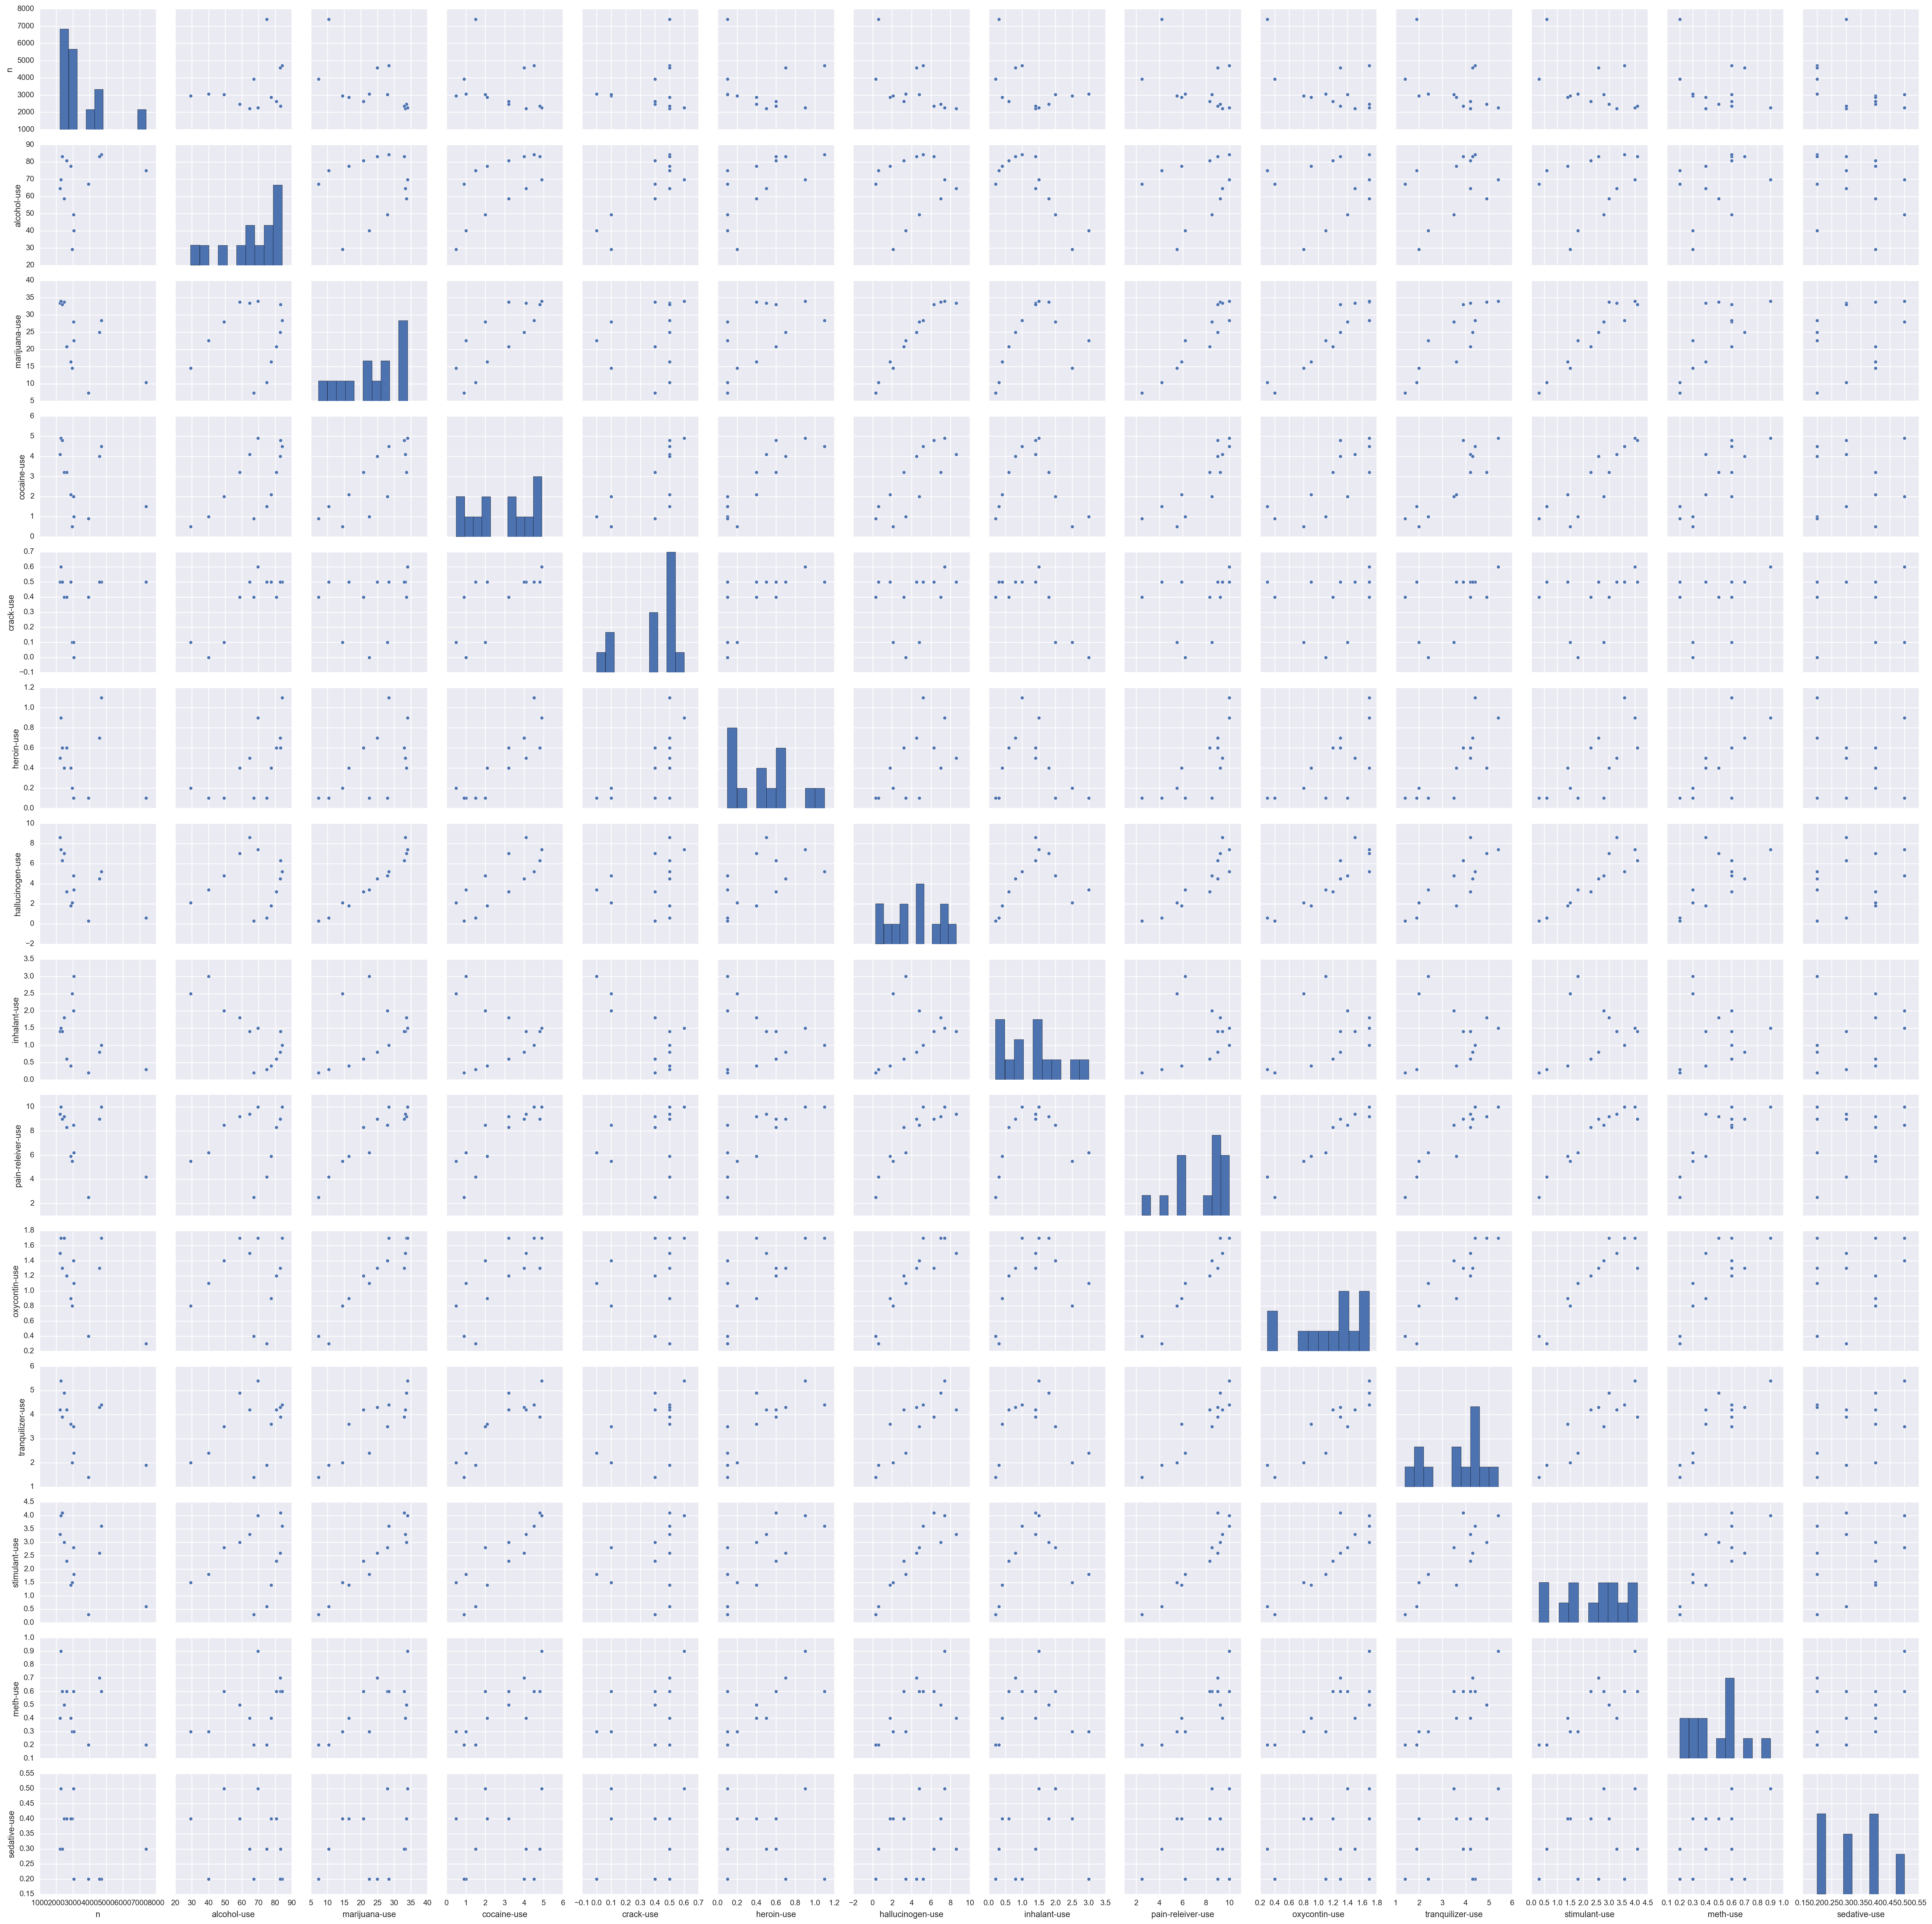

In [190]:
sns.pairplot(df2_use)

It is hard to see if there is a defining distribution for any types of drugs since we have a small number of samples (age groups) to work with.

In [191]:
df2_use_summary = df2_use.describe().transpose()
df2_use_summary

,count,mean,std,min,25%,50%,75%,max
n,13.0,3421.000000,1451.202892,2223.0,2469.0,2956.0,3923.0,7391.0
alcohol-use,13.0,66.346154,17.610585,29.2,58.7,69.7,80.7,84.2
marijuana-use,13.0,23.638462,9.229801,7.3,16.4,24.9,33.0,34.0
cocaine-use,13.0,2.823077,1.573295,0.5,1.5,3.2,4.1,4.9
crack-use,13.0,0.384615,0.190815,0.0,0.4,0.5,0.5,0.6
heroin-use,13.0,0.446154,0.328165,0.1,0.1,0.4,0.6,1.1
hallucinogen-use,13.0,4.246154,2.633950,0.3,2.1,4.5,6.3,8.6
inhalant-use,13.0,1.300000,0.865063,0.2,0.6,1.4,1.8,3.0
pain-releiver-use,13.0,7.515385,2.402723,2.5,5.9,8.5,9.2,10.0
oxycontin-use,13.0,1.176923,0.465750,0.3,0.9,1.3,1.5,1.7


It's hard to tell if there are any outliers from just looking at the summary table. Therefore, we will create additional columns to identify outliers.

In [192]:
# Creates a Interquartile Range column from Q3 and Q1
df2_use_summary['IQR'] = df2_use_summary['75%']-df2_use_summary['25%']
df2_use_summary

# Creates an Upper Bound for outliers from IQR and Q3
df2_use_summary['UB'] = df2_use_summary['75%']+1.5*df2_use_summary['IQR']
df2_use_summary


,count,mean,std,min,25%,50%,75%,max,IQR,UB
n,13.0,3421.000000,1451.202892,2223.0,2469.0,2956.0,3923.0,7391.0,1454.0,6104.00
alcohol-use,13.0,66.346154,17.610585,29.2,58.7,69.7,80.7,84.2,22.0,113.70
marijuana-use,13.0,23.638462,9.229801,7.3,16.4,24.9,33.0,34.0,16.6,57.90
cocaine-use,13.0,2.823077,1.573295,0.5,1.5,3.2,4.1,4.9,2.6,8.00
crack-use,13.0,0.384615,0.190815,0.0,0.4,0.5,0.5,0.6,0.1,0.65
heroin-use,13.0,0.446154,0.328165,0.1,0.1,0.4,0.6,1.1,0.5,1.35
hallucinogen-use,13.0,4.246154,2.633950,0.3,2.1,4.5,6.3,8.6,4.2,12.60
inhalant-use,13.0,1.300000,0.865063,0.2,0.6,1.4,1.8,3.0,1.2,3.60
pain-releiver-use,13.0,7.515385,2.402723,2.5,5.9,8.5,9.2,10.0,3.3,14.15
oxycontin-use,13.0,1.176923,0.465750,0.3,0.9,1.3,1.5,1.7,0.6,2.40


We did not calculate the lower bound because any outlier in the other direction would be a negative value which is not within the range of dataset.

Now that we have a upper bound cutoff point, we can easily check to see if there any max values that exceeds the UB to see if there are any outliers. Here we do not see any outliers. 

In [193]:
df2_use.corr()

,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
n,1.000000,0.262853,-0.541659,-0.252201,0.159498,-0.147057,-0.551648,-0.452207,-0.423865,-0.544819,-0.443580,-0.496089,-0.365818,-0.436241
alcohol-use,0.262853,1.000000,0.128016,0.653442,0.852568,0.617624,0.095365,-0.799623,0.274324,0.120638,0.421341,0.250654,0.382556,-0.238369
marijuana-use,-0.541659,0.128016,1.000000,0.795208,0.209504,0.575207,0.971401,0.384293,0.932671,0.937893,0.851930,0.953014,0.723764,0.258362
cocaine-use,-0.252201,0.653442,0.795208,1.000000,0.692469,0.870965,0.783590,-0.171443,0.855675,0.757058,0.870518,0.874367,0.799964,0.052886
crack-use,0.159498,0.852568,0.209504,0.692469,1.000000,0.637763,0.265162,-0.737076,0.285926,0.164454,0.494705,0.295781,0.372279,-0.054506
heroin-use,-0.147057,0.617624,0.575207,0.870965,0.637763,1.000000,0.554576,-0.205483,0.747290,0.683625,0.780207,0.727076,0.757629,-0.042258
hallucinogen-use,-0.551648,0.095365,0.971401,0.783590,0.265162,0.554576,1.000000,0.348543,0.888430,0.896251,0.815641,0.911319,0.647738,0.231437
inhalant-use,-0.452207,-0.799623,0.384293,-0.171443,-0.737076,-0.205483,0.348543,1.000000,0.238954,0.357820,0.013938,0.288735,0.041773,0.182348
pain-releiver-use,-0.423865,0.274324,0.932671,0.855675,0.285926,0.747290,0.888430,0.238954,1.000000,0.953518,0.923086,0.946847,0.836046,0.254430
oxycontin-use,-0.544819,0.120638,0.937893,0.757058,0.164454,0.683625,0.896251,0.357820,0.953518,1.000000,0.897999,0.912601,0.780507,0.256806


We can see that there are many high positive correlations between marijuana-use and other drugs such as hallucinogen- pain-reliever-use, oxycontin-use, and stimulant-use. 

In addition, we see that inhalant-use has quite a few negative correlations with other drug uses such as alcohol, cocaine, crack, and heroin.

In [194]:
#sns.pairplot(df2_freq)

In [195]:
df2_freq_summary = df2_freq.describe().transpose()
df2_freq_summary

,count,mean,std,min,25%,50%,75%,max
n,13.0,3421.000000,1451.202892,2223.0,2469.0,2956.0,3923.0,7391.0
alcohol-frequency,13.0,38.538462,18.487002,6.0,24.0,52.0,52.0,52.0
marijuana-frequency,13.0,50.076923,13.002958,25.0,48.0,52.0,60.0,72.0
cocaine-frequency,13.0,8.807692,8.644696,4.0,5.0,5.5,8.0,36.0
crack-frequency,13.0,15.961538,18.502772,1.0,5.0,9.5,17.0,62.0
heroin-frequency,13.0,78.076923,73.427642,1.0,45.0,57.5,66.5,280.0
hallucinogen-frequency,13.0,6.153846,11.393318,2.0,3.0,3.0,4.0,44.0
inhalant-frequency,13.0,4.807692,3.294809,2.0,3.0,4.0,4.0,13.5
pain-releiver-frequency,13.0,12.615385,3.708964,7.0,10.0,12.0,15.0,22.0
oxycontin-frequency,13.0,12.846154,11.257191,3.0,6.0,12.0,13.5,46.0


In [196]:
# Creates a Interquartile Range column from Q3 and Q1
df2_freq_summary['IQR'] = df2_freq_summary['75%']-df2_freq_summary['25%']
df2_freq_summary

# Creates an Upper Bound for outliers from IQR and Q3
df2_freq_summary['UB'] = df2_freq_summary['75%']+1.5*df2_freq_summary['IQR']
df2_freq_summary

,count,mean,std,min,25%,50%,75%,max,IQR,UB
n,13.0,3421.000000,1451.202892,2223.0,2469.0,2956.0,3923.0,7391.0,1454.0,6104.00
alcohol-frequency,13.0,38.538462,18.487002,6.0,24.0,52.0,52.0,52.0,28.0,94.00
marijuana-frequency,13.0,50.076923,13.002958,25.0,48.0,52.0,60.0,72.0,12.0,78.00
cocaine-frequency,13.0,8.807692,8.644696,4.0,5.0,5.5,8.0,36.0,3.0,12.50
crack-frequency,13.0,15.961538,18.502772,1.0,5.0,9.5,17.0,62.0,12.0,35.00
heroin-frequency,13.0,78.076923,73.427642,1.0,45.0,57.5,66.5,280.0,21.5,98.75
hallucinogen-frequency,13.0,6.153846,11.393318,2.0,3.0,3.0,4.0,44.0,1.0,5.50
inhalant-frequency,13.0,4.807692,3.294809,2.0,3.0,4.0,4.0,13.5,1.0,5.50
pain-releiver-frequency,13.0,12.615385,3.708964,7.0,10.0,12.0,15.0,22.0,5.0,22.50
oxycontin-frequency,13.0,12.846154,11.257191,3.0,6.0,12.0,13.5,46.0,7.5,24.75


Unlike the drug use (presume to be overall dosage amount), there are some outliers for drug use frequencies. Here, we see that cocaine, heroin, hallucinogen, inhalant, oxycontin, stimulant, meth, and sedative all exceed the UB and have outliers.

In [197]:
#column = []
#for i in df2:
    #column.append(i)
#column.pop(0)
#column

In [198]:
#for col in column:
    #sns.boxplot(df2[col])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

# Question/Hypothesis

Are the usage of marijuana highly correlated with the usage of heroine?

# Deliverable

Show how many of the age groups has high correlation between marijuana and heroine.

# EDA


In [199]:
df2_question = df2.loc[:,["marijuana-frequency", "marijuana-use", "heroin-frequency", "heroin-use"]]
df2_question

,marijuana-frequency,marijuana-use,heroin-frequency,heroin-use
3,25.0,14.5,1.0,0.2
4,30.0,22.5,66.5,0.1
5,36.0,28.0,64.0,0.1
6,52.0,33.7,46.0,0.4
7,60.0,33.4,180.0,0.5
8,60.0,34.0,45.0,0.9
9,52.0,33.0,30.0,0.6
10,52.0,28.4,57.5,1.1
11,60.0,24.9,88.0,0.7
12,52.0,20.8,50.0,0.6


We import only the variables we're interested in from the main dataframe

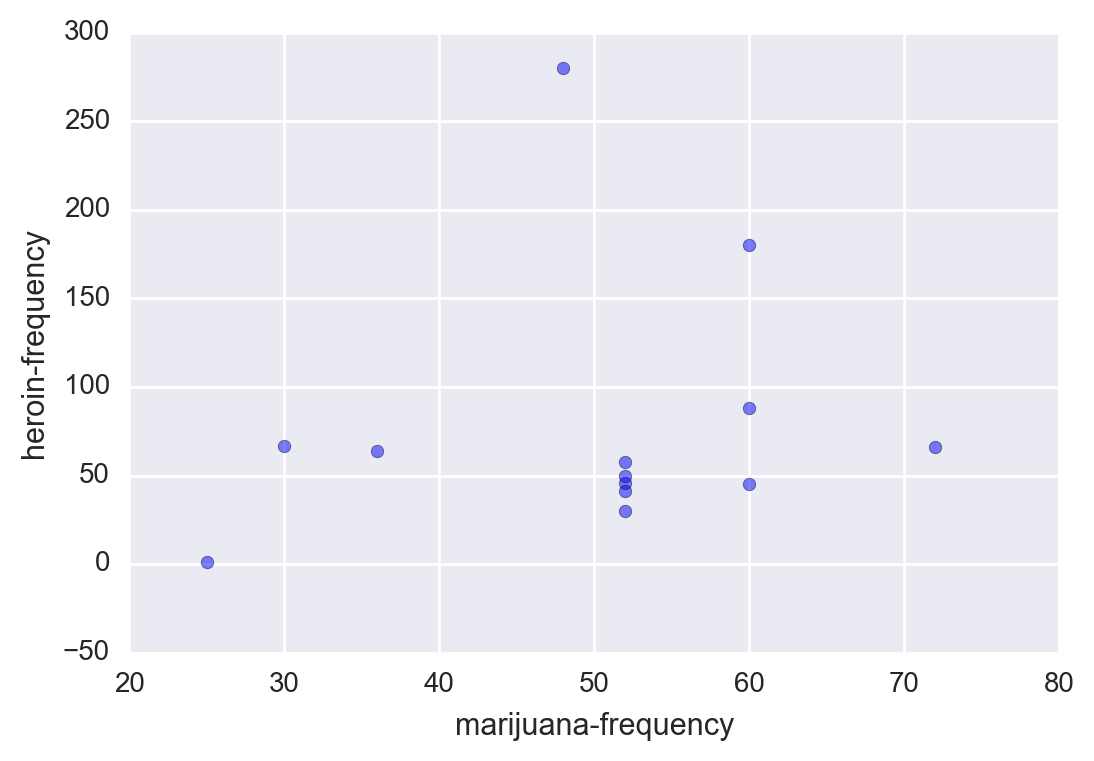

In [200]:
plt.scatter(df2_question["marijuana-frequency"], df2_question["heroin-frequency"], alpha=0.5)
plt.xlabel("marijuana-frequency")
plt.ylabel("heroin-frequency")
plt.show()

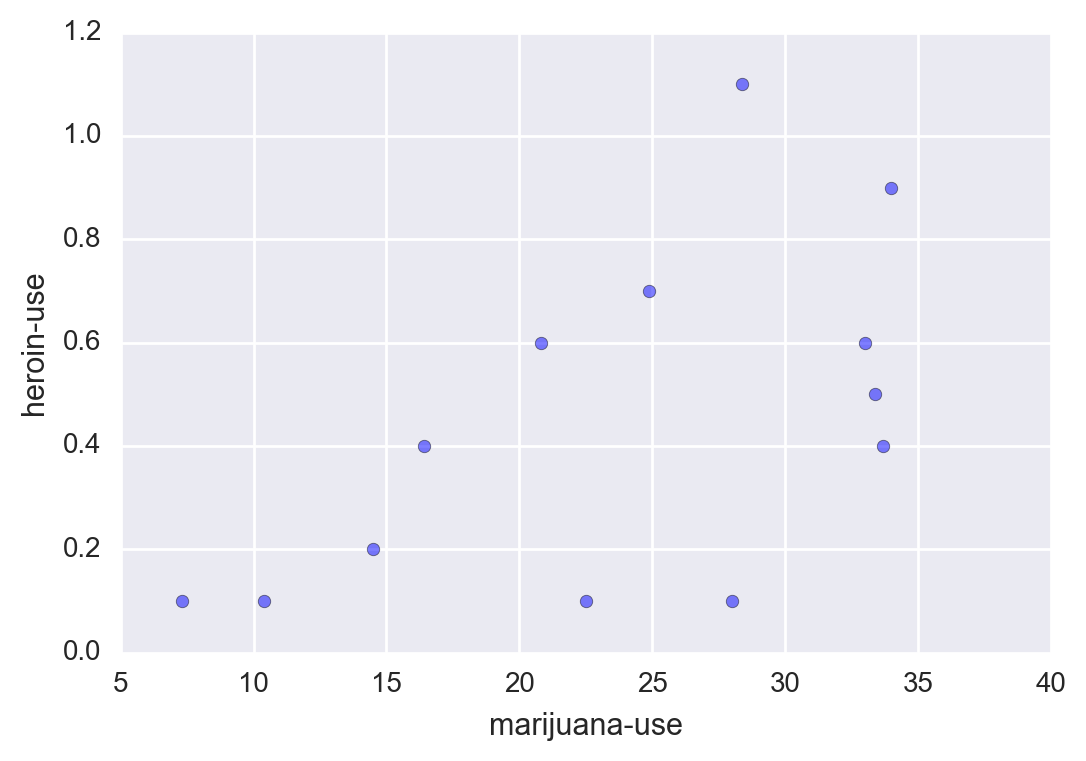

In [201]:
plt.scatter(df2_question["marijuana-use"], df2_question["heroin-use"], alpha=0.5)
plt.xlabel("marijuana-use")
plt.ylabel("heroin-use")
plt.show()

There doesn't seem to be any correlation between heroine and marijuana in terms of both use or freq.

In [202]:
df2_question.corr()

,marijuana-frequency,marijuana-use,heroin-frequency,heroin-use
marijuana-frequency,1.000000,0.195297,0.186948,0.514669
marijuana-use,0.195297,1.000000,-0.178316,0.575207
heroin-frequency,0.186948,-0.178316,1.000000,-0.205239
heroin-use,0.514669,0.575207,-0.205239,1.000000


It does not seem like there are high correlations between marijuana and heroine usage across all the 12 age groups.

# Report



We do not have enough information to conclude if there is a high correlation between marijuana usage and heroin usage.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Outliers are what I would consider points in a dataset that are either lower or higher than the 1st and 3rd quartile respectively by a difference of 1.5 times the IQR (which is the difference between the 3rd and 1st quartiler). 

In [203]:
# the 1st and 3rd quartile are derived from the summary statistics earlier
q1 = 9
q3 = 64
IQR = q3 - q1

lower_cutoff = q1 - 1.5*IQR
upper_cutoff = q3 + 1.5*IQR

print (lower_cutoff, upper_cutoff)

(-73.5, 146.5)


Since the IQR is 82.5, the lower and upper cutoff for outlier is outside of the range since percentage is restricted between 0 and 100%. Therefore, there are no outlier in this dataset.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.